In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import gradio as gr


In [2]:
df = pd.read_csv("/content/parkinsons.data")

print(df.head())
print(df.info())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

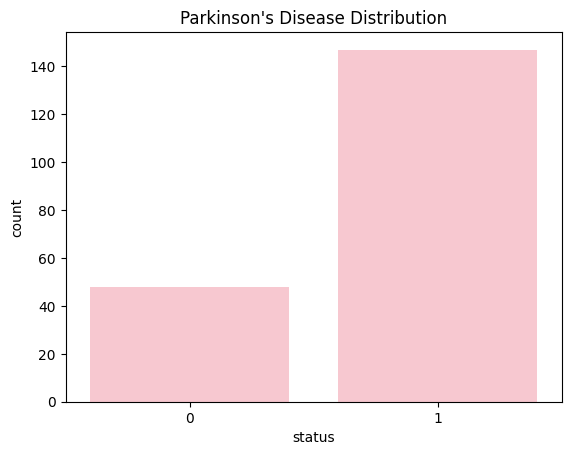

In [4]:
sns.countplot(x="status", data=df, color='pink')
plt.title("Parkinson's Disease Distribution")
plt.show()

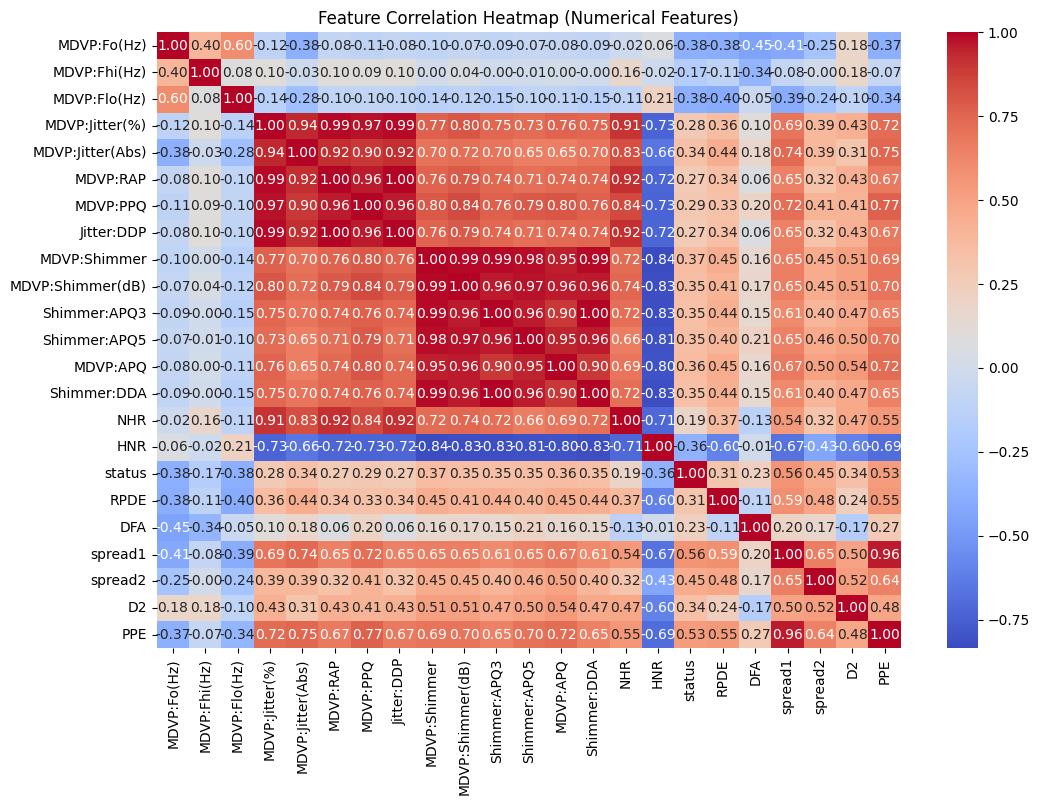

In [7]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap (Numerical Features)")
plt.show()


In [8]:
df.drop(columns=["name"], inplace=True)

In [9]:
X = df.drop("status", axis=1)
y = df["status"]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



In [14]:
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1],"kernel": ["rbf"]}

grid = GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [15]:
y_pred_best = best_model.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Final Accuracy: 0.9230769230769231
[[ 9  1]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



In [16]:
importance = np.abs(best_model.dual_coef_[0])

In [17]:
def predict_parkinsons(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    prediction = best_model.predict(input_scaled)[0]

    return "Parkinson’s Detected" if prediction == 1 else "Healthy"


In [18]:
inputs = []
for col in X.columns:
    inputs.append(gr.Number(label=col))

app = gr.Interface(
    fn=predict_parkinsons,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction"),
    title="Parkinson’s Disease Detection System",
    description="SVM-based Medical Decision Support System with High Accuracy"
)

app.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d80b974dddfdb20fb3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
